In [502]:
#import modules
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [503]:
#import dataset

hprices = pd.read_csv('activity-4.2-house_prices.csv', delimiter=';', skiprows=0)
hprices.head()



,Id,LotArea,YearBuilt,BedroomAbvGr,GarageCars,GarageArea,SalePrice
0,1,8450,2003,3,2.0,548.0,208500.0
1,2,9600,1976,3,2.0,460.0,181500.0
2,3,11250,2001,3,2.0,608.0,223500.0
3,4,9550,1915,3,3.0,642.0,140000.0
4,5,14260,2000,4,3.0,836.0,250000.0


In [504]:
hprices.drop('Id', axis=1).describe()

,LotArea,YearBuilt,BedroomAbvGr,GarageCars,GarageArea,SalePrice
count,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,10168.114080,1971.312778,2.860226,1.766621,472.874572,180921.195890
std,7886.996359,30.291442,0.822693,0.761624,215.394815,79442.502883
min,1300.000000,1872.000000,0.000000,0.000000,0.000000,34900.000000
25%,7478.000000,1953.500000,2.000000,1.000000,320.000000,129975.000000
50%,9453.000000,1973.000000,3.000000,2.000000,480.000000,163000.000000
75%,11570.000000,2001.000000,3.000000,2.000000,576.000000,214000.000000
max,215245.000000,2010.000000,8.000000,5.000000,1488.000000,755000.000000


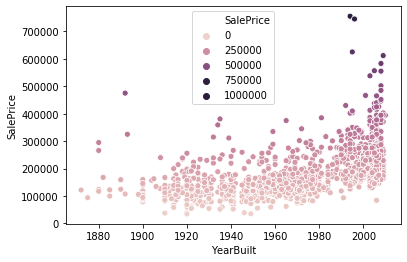

In [505]:
#visualizing 
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='SalePrice', data=hprices)



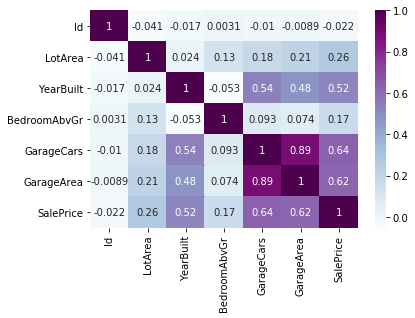

In [506]:
sns.heatmap(hprices.corr(), annot=True, cmap='BuPu')

In [507]:
#handling missing values 
# Se eu subtituir os valores dá uma r2score mt baixa ~0,28. preferi apaga-los, mesmo que seja uma data loss >40%

#x1 = hprices.drop('SalePrice', axis=1) 
#x2 = x1.drop('Id', axis=1) 
#x = x2.fillna(0) 
#y = hprices.SalePrice.fillna(hprices.SalePrice.median()) 

x1 = hprices[['LotArea','YearBuilt', 'BedroomAbvGr', 'GarageCars', 'GarageArea', 'SalePrice']]
x2 = x1.dropna()
x = x2.drop('SalePrice', axis=1)
y1 = hprices[['SalePrice']]
y = y1.dropna()

#splitting 
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size=0.25,random_state=1)

[[190066.65300571]]


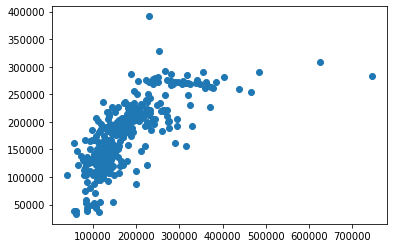

In [508]:
#regression model and prediction 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

pred = regressor.predict(x_test)

plt.scatter(y_test, pred)

print(regressor.predict([[9600, 1976, 3, 2, 460.0]]))
#9600 	1976 	3 	2.0 	460.0 ---> 181500.0


In [509]:
from sklearn.metrics import r2_score
print('R2 score:' , r2_score(y_test, pred))


print('\n Coefficients: \n', regressor.coef_)

R2 score: 0.508438213061464

 Coefficients: 
 [[1.31081654e+00 7.43083525e+02 1.29322306e+04 2.48874209e+04
  9.10940334e+01]]
